In [3]:
# Loading the libraries
import tensorflow as tf
import tensorflow.keras.datasets
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Loading the dataset
(X_train, y_train),(X_test, y_test) = tf.keras.datasets.mnist.load_data(path='mnist.npz')

11493376/11490434 [==============================] - 0s 0us/step


In [66]:
# various classes
clothes = ["T-shirt", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [5]:
# Dataset Size
print (X_train.shape,y_train.shape)
print (X_test.shape,y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


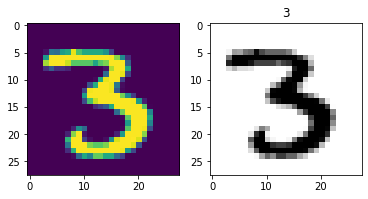

In [21]:
# Visualizing the input data set
fig,axis = plt.subplots(1,2)
plt.title(y_train[12])
axis[0].imshow(X_train[12])
axis[1].imshow(X_train[12], cmap=plt.cm.binary)
plt.show()

In [54]:
# Normalizing and Reshaping
X_train, X_test = X_train / 255.0 , X_test / 255.0
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)
print (X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [55]:
# Model Definition
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,kernel_size=(3,3), padding='same', activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=(3,3),padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),strides=2))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128,activation='relu'))

model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [24]:
# Compiling the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [25]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               401536    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [8]:
# Fitting the model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, shuffle=True)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1373 - accuracy: 0.9578 - val_loss: 0.0549 - val_accuracy: 0.9820
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0464 - accuracy: 0.9851 - val_loss: 0.0604 - val_accuracy: 0.9823
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0316 - accuracy: 0.9895 - val_loss: 0.0416 - val_accuracy: 0.9870
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0217 - accuracy: 0.9930 - val_loss: 0.0390 - val_accuracy: 0.9871
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0156 - accuracy: 0.9951 - val_loss: 0.0381 - val_accuracy: 0.9901
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0132 - accuracy: 0.9954 - val_loss: 0.0434 - val_accuracy: 0.9901
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9962 - val_loss: 0.0448 - val_accuracy:

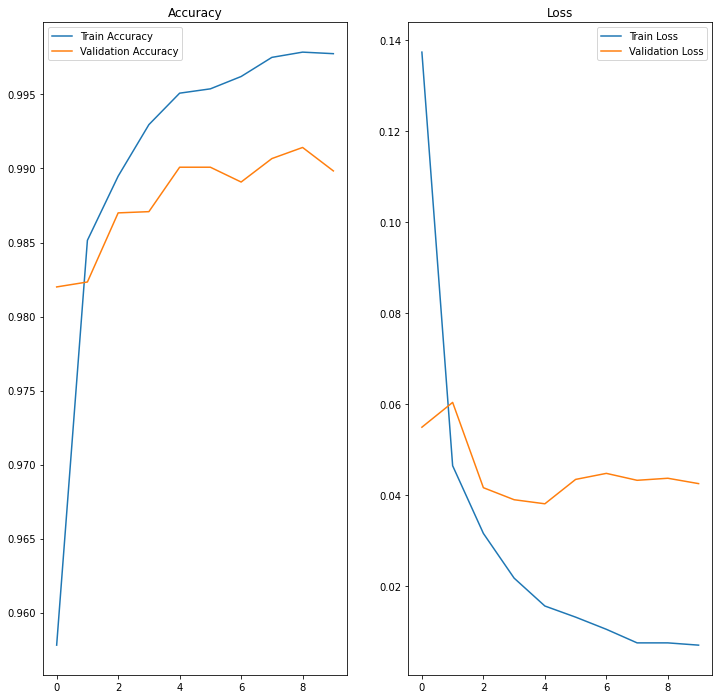

In [9]:
# Training and Validation Accuracy and Losses
train_accuracy = history.history['accuracy']
train_loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

plt.figure(figsize=(12,12))
epochs_range = range(10)

plt.subplot(1,2,1)
plt.plot(epochs_range, train_accuracy, label="Train Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epochs_range,train_loss, label="Train Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend()
plt.title("Loss")

plt.show()

Actual value is : 7
Predicted digit is  : 7


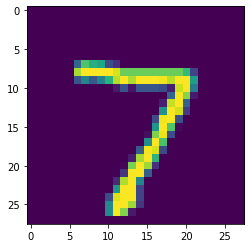

In [61]:
# Visualizing predictions
plt.imshow(np.squeeze(X_test[0]))
predictions = model.predict(X_test)
print ('Actual value is : {}'.format(y_test[0]))
print ('Predicted digit is  : {}'.format(np.argmax(predictions[0])))
plt.show()

In [10]:
# Test Loss and Accuracy
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print ("Test Accuracy : {}".format(test_accuracy))

313/313 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9899
Test Accuracy : 0.9898999929428101
